#### Q1-Use the example Notebook for ultrasound to open the  les and render the images obtained from the lab. Provide with a link to this notebook in your GitHub and screen shots of the image(s) rendered.

524288


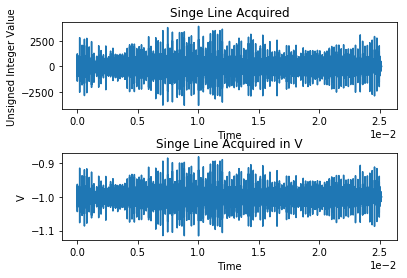

In [5]:
%matplotlib inline

#now we import different packages that will allow to do math, lineal algebra, numerical operations, array operations and plotting
import scipy as Sci
import scipy.linalg
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from scipy.signal import hilbert

f = open('LabRFdata.dat','rb')   # Windows
Line = np.fromfile(f,count=-1,dtype=np.int16)
L=len(Line)
f.close() 
x=np.arange(0,L/20.83e6,1/20.83e6)
print(+L)
plt.subplots_adjust( hspace = .5 )
plt.subplot(211)
plt.plot(x,Line[:L])
plt.title('Singe Line Acquired')
plt.xlabel('Time')
plt.ylabel('Unsigned Integer Value')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

LineF=Line.astype(np.float64)
LineF/=(2**15-1)
LineF-=1.
plt.subplot(212)
plt.plot(x,LineF[:L])
plt.title('Singe Line Acquired in V')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#### Q2. What is the frequency that is observed in your signal?

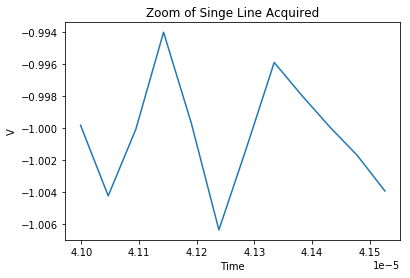

In [6]:
inx1=np.where(x>0.40993e-4)
inx1=inx1[0]
inx2=np.where(x>0.4156e-4)
inx2=inx2[0]
plt.plot(x[inx1[0]:inx2[0]],LineF[inx1[0]:inx2[0]])
plt.title('Zoom of Singe Line Acquired')
plt.xlabel('Time')
plt.ylabel('V')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

Since 1.5 cycles of the signal are between $0.40993\times 10^{-4}$ and $0.4156\times ^{-4}$ we then have a frequency of $\frac{1}{(0.40993\times 10^{-4}-0.4156\times 10^{-4})/1.5}=2.6MHz$

We will now obtain this using DFT. Note: just as we did before, we will take away the dc component!

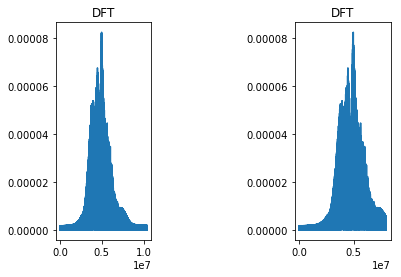

In [7]:
#Eliminating dc
LineF-=np.mean(LineF)
f=np.arange(0,20.83e6/2,20.83e6/L)
Y=np.fft.fft(LineF)
Pyy=abs(Y)/L
plt.subplots_adjust( wspace = 1.5 )
plt.subplot(121)
L2=int(len(Pyy)/2)

plt.plot(f[:L2], Pyy[:L2])
plt.title('DFT')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#Zooming into just less than 8MHz
inx=np.where(f>8e6)
inx=inx[0]
plt.subplot(122)
plt.plot(f[:inx[0]], Pyy[:inx[0]])
plt.title('DFT')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

#### Q3. What is the bandwidth observed in your signal?



One definition of bandwidth, for a system, could be the range of frequencies over which the system produces a specified level of performance. A less strict and more practically useful definition will refer to the frequencies beyond which frequency response is small. Small could mean less than 3 dB below the maximum value, or more rarely 10 dB below, or it could mean below a certain absolute value. As with any definition of the width of a function, many definitions are suitable for different purposes. Bandwidth typically refers to baseband bandwidth in the context of, for example, the sampling theorem and Nyquist sampling rate, while it refers to passband bandwidth in the context of Nyquist symbol rate or Shannon-Hartley channel capacity for communication systems.


#### Q5.  DICOM  file is provided on GitHub under the name US-Mono-2-8-8x-execho.dcm from anultrasound machine.  Modify the DICOM notebook from the course to open this  file.  Explainany modifications on the code you needed to make to render the image.  Provide a snap shot of the image rendered.  Note:  remember ultrasound will have multiple images in one singleDICOM (multiple frames), open one frame only.

In [13]:
%matplotlib inline
from skimage import novice, data, io, exposure
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import dicom
import os

RefDs = dicom.read_file('US-MONO2-8-8x-execho.dcm')

print(RefDs)

(0008, 0000) Group Length                        UL: 342
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'TTE', '0001']
(0008, 0016) SOP Class UID                       UI: Ultrasound Multi-frame Image Storage
(0008, 0018) SOP Instance UID                    UI: 999.999.2.19941105.134500.2.101
(0008, 0020) Study Date                          DA: '1994.11.05'
(0008, 0023) Content Date                        DA: '1994.11.05'
(0008, 0030) Study Time                          TM: '13:45:00'
(0008, 0060) Modality                            CS: 'US'
(0008, 0070) Manufacturer                        LO: 'Acme Products'
(0008, 0090) Referring Physician's Name          PN: 'Anonymized'
(0008, 1030) Study Description                   LO: 'Exercise Echocardiogram'
(0008, 103e) Series Description                  LO: 'Post-Stress'
(0008, 2120) Stage Name                          SH: 'Post-Exercise'
(0008, 2122) Stage Number                        IS: '2'
(0008, 2124) Nu

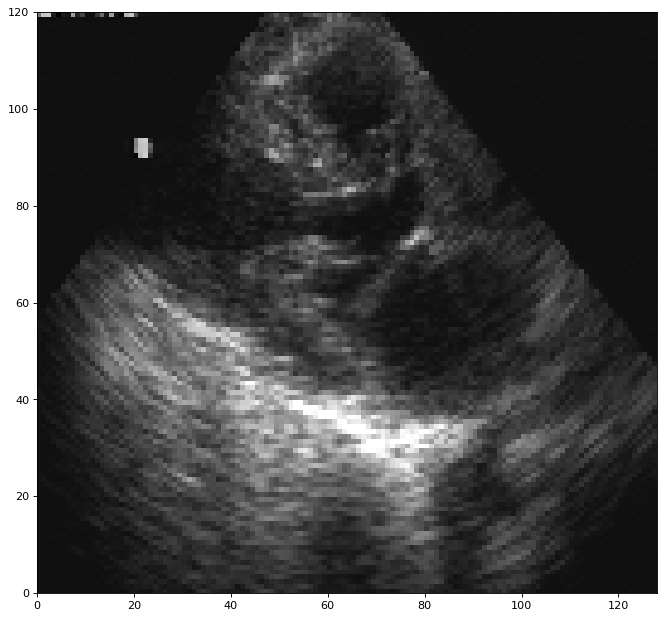

In [19]:
ConstPixelDims = (int(RefDs.NumberofFrames),int(RefDs.Rows), int(RefDs.Columns))
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
ds = dicom.read_file('US-MONO2-8-8x-execho.dcm')
ArrayDicom[:,:,:]=ds.pixel_array

fig = plt.figure(figsize=(10,10),dpi=80,facecolor='w',edgecolor='k')
plt.axes().set_aspect('equal') #this makes the image square
plt.set_cmap(plt.gray()) #grayscale
plt.pcolormesh(numpy.flipud(ArrayDicom[7,:,:]))
